<a href="https://colab.research.google.com/github/woxff/pytorch/blob/main/intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import torch

In [49]:
import numpy as np

In [50]:
import torch.nn as nn

In [51]:
import torch.nn.functional as F

In [66]:
#Create a Model Class that inherits nn.Model

class Model(nn.Module):
  # Input layer (4 features of the flower) ----- >
   # Hidden Layer1(number of neurons)----->
   # H2(n)---->
   # output (3 classes of iris flowers)
   def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super(Model,self).__init__() # instantiate our nn.module
    self.fc1=nn.Linear(in_features,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,out_features)

   def forward(self,x):
    x= F.relu(self.fc1(x))
    x= F.relu(self.fc2((x)))
    x= self.out(x)

    return x

In [67]:
#Pick a manual seed for randomization
torch.manual_seed(7)
model = Model()

In [68]:
import pandas as pd

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
#my_df.tail()

In [71]:
#Change last column from strings to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
#my_df

In [72]:
#Train Test Split! Set X, Y

In [73]:
X = my_df.drop('variety', axis=1)
y = my_df['variety']

#Convert these to numpy arrays
X = X.values
y = y.values
from sklearn.model_selection import train_test_split

# Train test Split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state=7)

# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Set the criterion of model to measure the error, how far off the predictions are from the data

criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

# Train our model!
# Epochs? (one run thru all the training data in our network)

epochs = 100
losses = []

for i in range (epochs):
  # Go forward and get prediction
   y_pred = model.forward(X_train) # Get predicted results

   # Measure the loss/error, gonna be high at first
   loss = criterion (y_pred, y_train) # predicated value vs the y_train

  # Keep Track of our losses

   losses.append(loss.detach().numpy())

   # print every 10 epoch

   if i%10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

    # Do some back propogation: take the error rate of forward propagation and feed it back
    # thru the network to fine tune the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()






Epoch: 0 and loss: 1.142297387123108
Epoch: 10 and loss: 1.1200498342514038
Epoch: 20 and loss: 1.0981889963150024
Epoch: 30 and loss: 1.0771671533584595
Epoch: 40 and loss: 1.0595470666885376
Epoch: 50 and loss: 1.0438652038574219
Epoch: 60 and loss: 1.027721643447876
Epoch: 70 and loss: 1.012020230293274
Epoch: 80 and loss: 0.9977449178695679
Epoch: 90 and loss: 0.9846876859664917


Text(0.5, 0, 'Epoch')

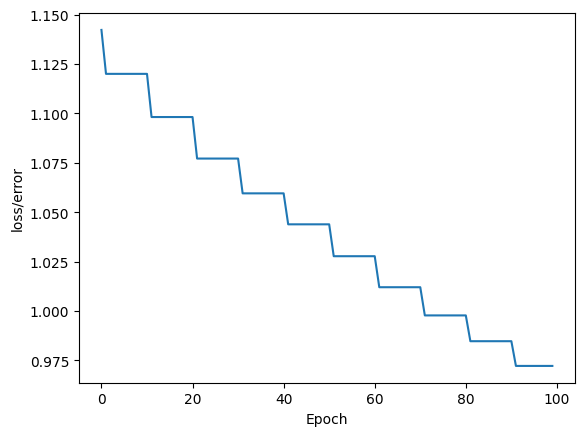

In [74]:
# Graph it out!

plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')


In [75]:
# Evaluate Model on Test Data Set (validate model on test set)

with torch.no_grad():   # Basically turn off back propagation
  y_eval = model.forward (X_test) #X_test are features from our test set, y_eval will be predications
  loss = criterion (y_eval,y_test) # Find the loss or error


In [76]:
correct = 0;
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
     x = "Setosa"
    elif y_test[i] == 1:
     x = "Versicolor"
    else:
     x = 'Verginica'

    # will tell of us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')
    # Correct or not

    if y_val.argmax().item()  == y_test[i]:
      correct += 1

print(f'We got {correct} correct!')


1.) tensor([-1.0789, -0.5200, -0.2834]) 	 2 	 2
2.) tensor([-0.8955, -0.4861, -0.2426]) 	 1 	 2
3.) tensor([-0.1033, -0.3111, -0.0691]) 	 0 	 2
4.) tensor([-0.9149, -0.4851, -0.2466]) 	 1 	 2
5.) tensor([-0.9131, -0.4646, -0.2534]) 	 2 	 2
6.) tensor([-0.1873, -0.2620, -0.0932]) 	 0 	 2
7.) tensor([-1.1089, -0.5098, -0.2837]) 	 1 	 2
8.) tensor([-0.8778, -0.4547, -0.2381]) 	 1 	 2
9.) tensor([-0.1489, -0.3290, -0.0752]) 	 0 	 2
10.) tensor([-0.9703, -0.4899, -0.2569]) 	 1 	 2
11.) tensor([-1.1312, -0.5107, -0.2926]) 	 1 	 2
12.) tensor([-0.9149, -0.4991, -0.2465]) 	 1 	 2
13.) tensor([-0.0932, -0.3440, -0.0619]) 	 0 	 2
14.) tensor([-1.3745, -0.5974, -0.3502]) 	 2 	 2
15.) tensor([-0.1480, -0.3137, -0.0762]) 	 0 	 2
16.) tensor([-0.9975, -0.5085, -0.2672]) 	 1 	 2
17.) tensor([-1.3502, -0.5413, -0.3381]) 	 2 	 2
18.) tensor([-1.1955, -0.5485, -0.3046]) 	 2 	 2
19.) tensor([-0.1338, -0.3447, -0.0699]) 	 0 	 2
20.) tensor([-0.0915, -0.3250, -0.0613]) 	 0 	 2
21.) tensor([-0.8324, -0.4350